# Car Price Prediction By Using Linear & Lasso Regression

In [1]:
#  Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Sample Collection & Data Anlaysis

In [2]:
# laod the data set

car_data = pd.read_csv("car data.csv")

In [3]:
# To check First Five records
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# To check shape of the data( Row & Columns)
car_data.shape

(301, 9)

In [5]:
# To check data type 

car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# to check any null Values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# To check column name

car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
# To check unique data present in dataset

print(car_data['Fuel_Type'].unique())
print(car_data['Seller_Type'].unique())
print(car_data['Transmission'].unique())
print(car_data['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [9]:
# Convert Categorical data into numeric values (Encoding)

car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1, 'CNG':2 }} , inplace= True)

car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1 }} , inplace= True)

car_data.replace({'Transmission':{'Manual':0,'Automatic':1 }} , inplace= True)

In [10]:
car_data=car_data.drop(['Car_Name'], axis= True)

In [11]:
car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


In [12]:
# to check Statistical data
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


In [13]:
# Again check data type

car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    int64  
 5   Seller_Type    301 non-null    int64  
 6   Transmission   301 non-null    int64  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


In [14]:
car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


# Data Preprocessing

In [15]:
# Separate the independent variable(X) & Dependent varibale(y)

X = car_data.drop(['Selling_Price'], axis=1)
y = car_data['Selling_Price']

In [16]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [17]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

# Train And Test Split

In [18]:
# import required libraries for test & train & model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [19]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (240, 7) (61, 7)


# Linear Regreession

In [21]:
#Model Training : Linear Regression

lin_reg =LinearRegression()

In [22]:
#training the Linear regression model with training data
lin_reg.fit(X_train, y_train)

LinearRegression()

# Model Evalution 

In [23]:
# Prediction on Training dataset

X_train_prediction=lin_reg.predict(X_train)

In [24]:
# R squared Error
error_score = metrics.r2_score(y_train, X_train_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8838169193709792


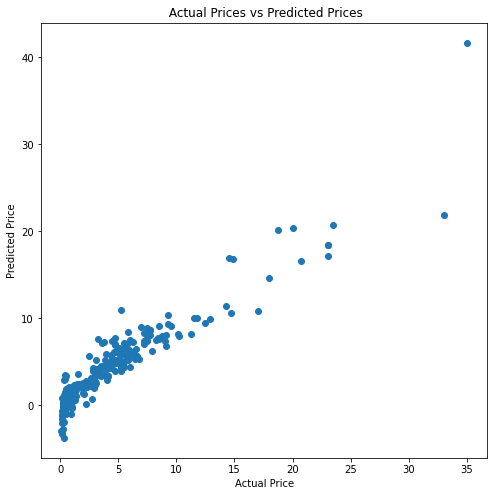

In [25]:
# Visualize the actual prices and Predicted prices

plt.figure(figsize=(8,8))
plt.scatter(x= y_train, y= X_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [26]:
# Prediction on testing dataset

X_test_prediction=lin_reg.predict(X_test)

In [27]:
# R squared Error
error_score = metrics.r2_score(y_test, X_test_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8401532365377782


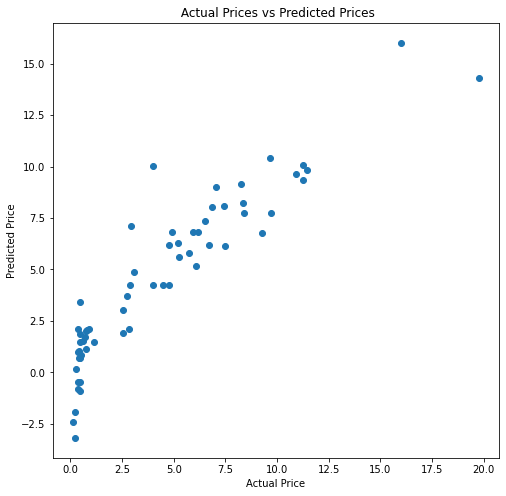

In [28]:
# Visualize the actual prices and Predicted prices

plt.figure(figsize=(8,8))
plt.scatter(x= y_test, y= X_test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Building Predictive Model

In [29]:
input_data = (2019,11.60,33988,1,0,0,0)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

model_prediction = lin_reg.predict(input_data_reshaped)
print("The Selling Price of Car is ",model_prediction)

The Selling Price of Car is  [10.31191498]


# Lasso Regression

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import metrics

In [31]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (240, 7) (61, 7)


In [33]:
#Model Training : Lasso Regression

lasso_reg =Lasso()

In [34]:
#training the Lasso regression model with training data

lasso_reg.fit(X_train, y_train)

Lasso()

# Model Evalution 

In [35]:
# Prediction on Training dataset

X_train_prediction=lasso_reg.predict(X_train)

In [36]:
error_score = metrics.r2_score(y_train, X_train_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8435873952582827


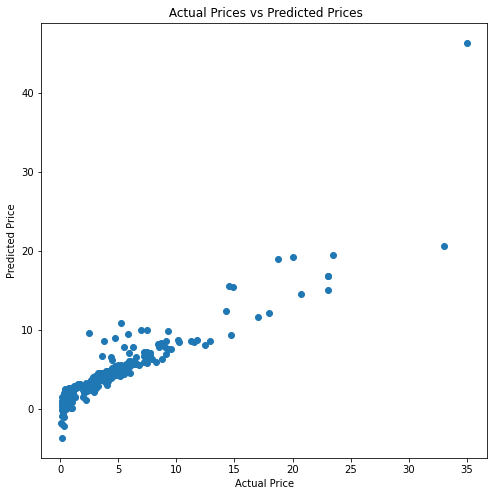

In [37]:
# Visualize the actual prices and Predicted prices

plt.figure(figsize=(8,8))
plt.scatter(x= y_train, y= X_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [38]:
# Prediction on testing dataset

X_test_prediction=lin_reg.predict(X_test)

In [39]:
# R squared Error
error_score = metrics.r2_score(y_test, X_test_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8401532365377782


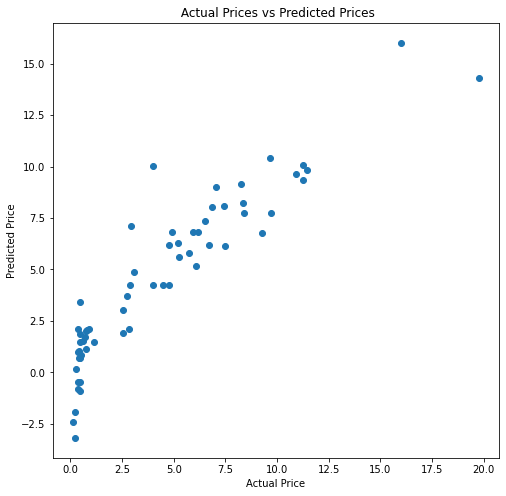

In [40]:
# Visualize the actual prices and Predicted prices

plt.figure(figsize=(8,8))
plt.scatter(x= y_test, y= X_test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Building Predictive Model

In [41]:
input_data = (2019,11.60,33988,1,0,0,0)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

model_prediction = lasso_reg.predict(input_data_reshaped)
print("The Selling Price of Car is ",model_prediction)

The Selling Price of Car is  [8.5480476]
